In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
%matplotlib inline
from sklearn.metrics import mean_squared_log_error

In [2]:
train_df=pd.read_csv("/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv")
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
# Rename the column names with special characters
def rename_col(df):
    
    df.rename(columns={'Temperature(�C)':'Temperature',
                   'Humidity(%)':'Humidity',
                   'Wind speed (m/s)':'Wind speed',
                   'Dew point temperature(�C)':'Dew point temperature',
                   'Solar Radiation (MJ/m2)':'Solar Radiation',
                   'Visibility (10m)':'Visibility',
                   'Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall'},inplace=True)
    
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# first check the info and type of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

In [5]:
train_df.describe()

,ID,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2879.500000,703.483854,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,1662.913107,655.249491,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,0.000000,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,1439.750000,188.000000,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,2879.500000,485.500000,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,4319.250000,1066.000000,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,5759.000000,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [6]:
def Add_Fog(train_df):
    train_df.loc[(train_df["Temperature"] -  train_df["Dew point temperature"]) < 2, 'Fog'] = 1 
    train_df.loc[(train_df["Temperature"] -  train_df["Dew point temperature"]) >= 2, 'Fog'] = 0 
    


In [7]:
# Change Date column to datetime type
def date_parse(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

    # Now let's extract all the values stored in the date variable 
    df['year']       = df['Date'].apply(lambda x:x.year)
    df['month']      = df['Date'].apply(lambda x:x.month)
    df['dayofweek']  = df['Date'].apply(lambda x:x.dayofweek) #The day of the week with Monday=0, Sunday=6.
    df['weekofyear'] = df['Date'].apply(lambda x:x.weekofyear)
    df['dayofyear'] = df['Date'].apply(lambda x:x.dayofyear)

    
date_parse(train_df)
train_df.tail(300)

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,dayofweek,weekofyear,dayofyear
5460,5460,2018-11-08,17,12,11.4,95,2.5,792,10.6,0.44,5.5,0.0,Autumn,No Holiday,Yes,2018,11,3,45,312
5461,5461,2018-11-08,18,13,11.5,95,2.1,457,10.7,0.32,0.0,0.0,Autumn,No Holiday,Yes,2018,11,3,45,312
5462,5462,2018-11-08,46,14,11.3,96,2.7,302,10.6,0.11,0.0,0.0,Autumn,No Holiday,Yes,2018,11,3,45,312
5463,5463,2018-11-08,56,15,11.4,96,2.0,910,10.7,0.07,9.5,0.0,Autumn,No Holiday,Yes,2018,11,3,45,312
5464,5464,2018-11-08,14,16,11.7,96,1.4,587,11.0,0.02,0.0,0.0,Autumn,No Holiday,Yes,2018,11,3,45,312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,2018-11-20,1317,19,8.7,34,2.2,1857,-6.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,47,324
5756,5756,2018-11-20,1078,20,8.5,32,2.6,1789,-7.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,47,324
5757,5757,2018-11-20,1020,21,8.8,37,3.8,1750,-5.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,47,324
5758,5758,2018-11-20,922,22,8.9,40,3.4,1810,-3.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,47,324


In [8]:
train_df.shape

(5760, 20)

In [9]:
# train_df['year'].value_counts()

In [10]:
train_df.apply(lambda x: len(x.unique()))

ID                           5760
Date                          240
y                            1890
Hour                           24
Temperature(�C)               515
Humidity(%)                    86
Wind speed (m/s)               63
Visibility (10m)             1584
Dew point temperature(�C)     516
Solar Radiation (MJ/m2)       340
Rainfall(mm)                   45
Snowfall (cm)                  36
Seasons                         4
Holiday                         2
Functioning Day                 2
year                            2
month                          12
dayofweek                       7
weekofyear                     45
dayofyear                     240
dtype: int64

In [11]:
# Generate dummies for Seasons
def encode_seasons(df):
    return pd.concat([df,pd.get_dummies(df['Seasons'],prefix="Seasons")],axis=1)

In [12]:
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,dayofweek,weekofyear,dayofyear
0,0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,335
1,1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,335
2,2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,335
3,3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,335
4,4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,4,48,335


In [13]:
#Create Working_day 
def create_working_day(train_df): 
    train_df['Working_day'] = 1
    train_df.loc[(train_df['Holiday']=='Holiday') | (train_df['dayofweek'] == 5) | (train_df['dayofweek'] == 6) ,'Working_day'] = 0


In [14]:
def cat_rainfall(train_df):
    train_df.loc[(train_df['Rainfall'] > 4),'Rainfall_cat'] = '0'
    train_df.loc[(train_df['Rainfall'] >1) & (train_df['Rainfall'] <= 4),'Rainfall_cat'] = '1'
    train_df.loc[(train_df['Rainfall'] != 0) & (train_df['Rainfall'] <= 1),'Rainfall_cat'] = '2'
    train_df.loc[train_df['Rainfall'] == 0,'Rainfall_cat'] = '3'
    train_df['Rainfall_cat'].value_counts()

In [15]:
def cat_snowfall(train_df):
    train_df.loc[(train_df['Snowfall'] > 3.5),'Snowfall_cat'] = '0'
    train_df.loc[(train_df['Snowfall'] >1) & (train_df['Snowfall'] <= 3.5),'Snowfall_cat'] = '1'
    train_df.loc[(train_df['Snowfall'] != 0) & (train_df['Snowfall'] <= 1),'Snowfall_cat'] = '2'
    train_df.loc[train_df['Snowfall'] == 0,'Snowfall_cat'] = '3'
    train_df['Snowfall_cat'].value_counts()

In [16]:
def cat_temperature(train_df):
    train_df.loc[(train_df['Temperature'] <5),'Temperature_cat'] = '0'
    train_df.loc[(train_df['Temperature'] >=5) & (train_df['Temperature'] < 15),'Temperature_cat'] = '1'
    train_df.loc[(train_df['Temperature'] >= 15) & (train_df['Temperature'] < 30),'Temperature_cat'] = '2'
    train_df.loc[train_df['Temperature'] >=30 ,'Temperature_cat'] = '3'
#     train_df['Temperature_cat'].value_counts()

In [17]:
def cat_humidity(train_df):

    train_df.loc[(train_df['Humidity'] >= 90),'Humidity_cat'] = '1'
    train_df.loc[train_df['Humidity'] <90 ,'Humidity_cat'] = '0'
#     train_df['Humidity_cat'].value_counts()

In [18]:
def cat_weather(train_df):

    train_df['weather'] = train_df['Rainfall_cat']+train_df['Snowfall_cat']+train_df['Temperature_cat']+train_df['Humidity_cat']
    

In [19]:
def convert_dtype(df):
    convert_dict = {'Rainfall_cat': int,
                    'Snowfall_cat': int,
                    'Temperature_cat': int,
                    'Humidity_cat': int  
               }
  
    df = df.astype(convert_dict)
    return df

In [20]:
# def rolling_mean(train_df):
#     cols = ['Temperature(�C)', 'Humidity(%)',
#        'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
#        'Solar Radiation (MJ/m2)']
#     for i in cols:
#         train_df[i+'_rolling_mean'] = train_df[i].rolling(window=4).mean()

In [21]:
def lag(train_df):
    cols = ['Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)']
    for i in cols:
        train_df[i + '_lag_1'] = train_df[i].shift(1)
        train_df[i + '_lag_2'] = train_df[i].shift(2)
        train_df[i + '_lag_3'] = train_df[i].shift(3)

        train_df[i + '_lag_-1'] = train_df[i].shift(-1)
        train_df[i + '_lag_-2'] = train_df[i].shift(-2)
        train_df[i + '_lag_-3'] = train_df[i].shift(-3)



        train_df.fillna(train_df[i])

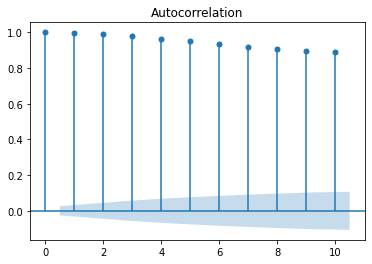

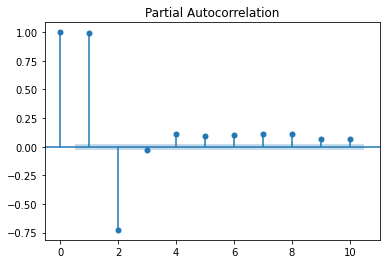

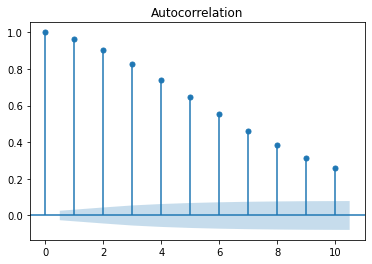

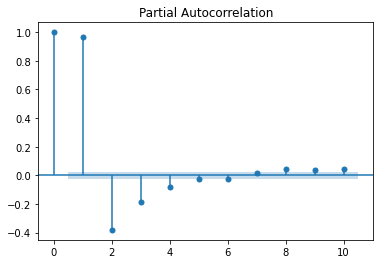

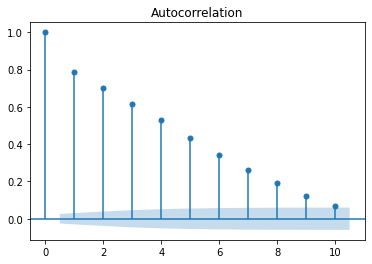

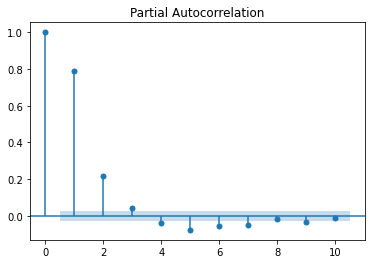

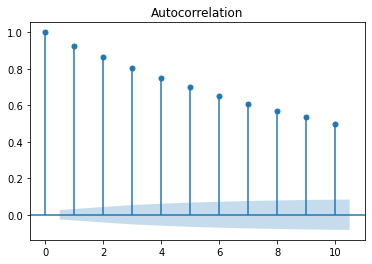

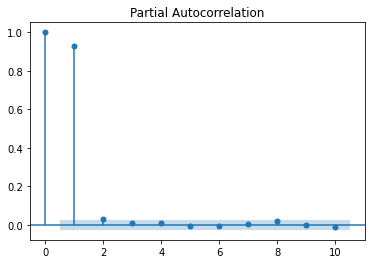

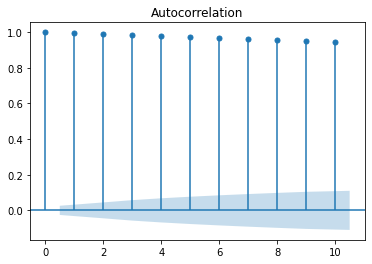

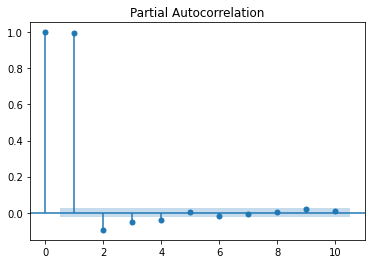

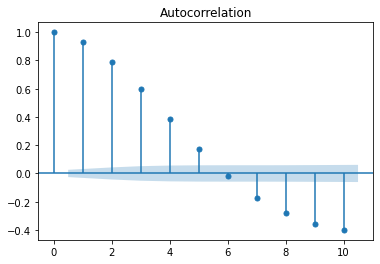

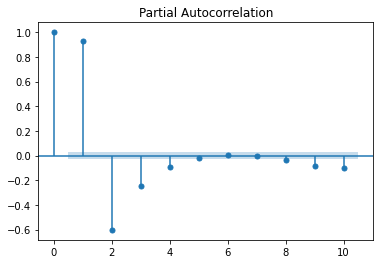

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
cols = ['Temperature(�C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)',
       'Solar Radiation (MJ/m2)']
for i in cols:
    plot_acf(train_df[i], lags=10)
    plot_pacf(train_df[i], lags=10)

In [23]:
def busy_weeks(train_df):
    train_df[   'busy week'] = 0 
    train_df.loc[train_df["weekofyear"].isin( [4,19,20,22,23,24,33,36,37,44,52]) , 'busy week'] = 1 
    train_df['vacant week'] = 0 
    train_df.loc[train_df["weekofyear"].isin( [17,21,30,39,43,51]) , 'vacant week'] = 1 
    
    

In [24]:
def new_seasons(train_df):
    train_df[   'new summer'] = 0 
    train_df.loc[train_df["dayofyear"].isin(list(range( 115,310 )))  , 'new summer'] = 1 
    train_df['new winter'] = 0 
    train_df.loc[train_df["dayofyear"].isin( list(range( 1,61 ))) , 'new winter'] = 1 
    train_df.loc[train_df["dayofyear"].isin( list(range( 334,366 ))) , 'new winter'] = 1 
    train_df['new spring'] = 0
    train_df.loc[train_df["dayofyear"].isin( list(range( 61,115 ))) , 'new spring'] = 1 
    train_df.loc[train_df["dayofyear"].isin( list(range( 310,334 ))) , 'new spring'] = 1 


In [25]:
def day_night(df):
    df['day or night']=df['Hour'].apply(lambda x : 0 if (x > 20 or x <= 5) else( 1 ))


In [26]:
def high_radiation(df):
    df['high uv']=df['Solar Radiation'].apply(lambda x : 1 if (x > 0 and x < 1 ) else( 0 ))


In [27]:
def PolynomialOne(train_df):
    train_df.loc[(train_df["Visibility"]**2  + train_df["Humidity"]*0.25 ) * ((train_df["Temperature"]*0.0001)**(1)) < 0,"PolynomialOne"] = 1
    train_df.loc[(train_df["Visibility"]**2  + train_df["Humidity"]*0.25 ) * ((train_df["Temperature"]*0.0001)**(1)) >= 0,"PolynomialOne"] = 0

In [28]:
def PolynomialTwo(train_df):
    train_df[   'PolyTwo'] = 0 
    train_df.loc[ (np.log(train_df["Visibility"])**-2   ) * ((train_df["Temperature"])**(0.5)* train_df["Rainfall"] ) *(train_df["Fog"]) > 0,"PolyTwo"] = 1

In [29]:
def sloarAndTemperature(train_df):
    train_df.loc[(train_df["Temperature"]**2 *   train_df["Solar Radiation"]) >= 3000, 'SloarAndTemperature'] = 1 
    train_df.loc[(train_df["Temperature"]**2 *   train_df["Solar Radiation"]) < 3000, 'SloarAndTemperature'] = 0

In [30]:
def rush_hour_weekday(df):
    df['rush_hour_weekday']=df['Hour'].apply(lambda x : 1 if ((x > 5 and x <= 9)or (x > 16 and x <= 20)) else( 0 ))
    
#Create rush_hour_weekend    
def rush_hour_weekend(df):
    df['rush_hour_weekend']=df['Hour'].apply(lambda x : 1 if (x >= 12 or x <= 16) else( 0 ))
    
#Create dead_hour  
def dead_hour(df):
    df['dead_hour']=df['Hour'].apply(lambda x : 1 if (x >= 1 or x <= 5) else( 0 ))

In [31]:
def savgol(df , col): 

    box = np.ones(48)/48
    df[col+" smoothed"] = np.convolve(df[col], box, mode='same')
    df[col+" smoothed"] = df[col+" smoothed"].rolling(window=25).mean()
    df[col+" smoothed"] = np.convolve(df[col+" smoothed"], box, mode='same')

In [32]:
train_df=pd.read_csv("/kaggle/input/seoul-bike-rental-ai-pro-iti/train.csv")
train_df.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [33]:
def transform_data(train_df):
    lag(train_df)
    rename_col(train_df)
    Add_Fog(train_df)
    date_parse(train_df)
    train_df = encode_seasons(train_df)
    create_working_day(train_df)
    cat_rainfall(train_df)
    cat_snowfall(train_df)
    cat_temperature(train_df)
    cat_humidity(train_df)
    cat_weather(train_df)
    train_df = convert_dtype(train_df)
    busy_weeks(train_df)
    new_seasons(train_df)
    day_night(train_df)
    high_radiation(train_df)
    sloarAndTemperature(train_df)
    
    rush_hour_weekday(train_df)
    rush_hour_weekend(train_df)
    dead_hour(train_df)
    
    savgol(train_df , 'Temperature')
    savgol(train_df , 'Humidity')
    savgol(train_df , 'Wind speed')
    savgol(train_df , 'Visibility')
    savgol(train_df , 'Dew point temperature')
    savgol(train_df , 'Solar Radiation')
      
#     PolynomialOne(train_df)
    PolynomialTwo(train_df)
#     print(train_df.head())
    return train_df
train_df = transform_data(train_df)

In [34]:
def factorize_data(df):
#     df =train_df
    values = {"Yes": 1, "No" : 0}
    df['Functioning Day'] = df['Functioning Day'].map(values)
    df['Seasons'],_ = pd.factorize(df['Seasons'])
    df['Holiday'],_ = pd.factorize(df['Holiday'])
    df['weather'],_ = pd.factorize(df['weather'])
    
#     df.describe()
    return df

In [35]:
df = factorize_data(train_df)
df = df[df['y'] != 0]

In [36]:
df.columns

Index(['ID', 'Date', 'y', 'Hour', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day',
       'Temperature(�C)_lag_1', 'Temperature(�C)_lag_2',
       'Temperature(�C)_lag_3', 'Temperature(�C)_lag_-1',
       'Temperature(�C)_lag_-2', 'Temperature(�C)_lag_-3', 'Humidity(%)_lag_1',
       'Humidity(%)_lag_2', 'Humidity(%)_lag_3', 'Humidity(%)_lag_-1',
       'Humidity(%)_lag_-2', 'Humidity(%)_lag_-3', 'Wind speed (m/s)_lag_1',
       'Wind speed (m/s)_lag_2', 'Wind speed (m/s)_lag_3',
       'Wind speed (m/s)_lag_-1', 'Wind speed (m/s)_lag_-2',
       'Wind speed (m/s)_lag_-3', 'Visibility (10m)_lag_1',
       'Visibility (10m)_lag_2', 'Visibility (10m)_lag_3',
       'Visibility (10m)_lag_-1', 'Visibility (10m)_lag_-2',
       'Visibility (10m)_lag_-3', 'Dew point temperature(�C)_lag_1',
       'Dew point temperature(�C)_lag_2', 'Dew point temperature(�C)_lag_3',

In [37]:
features=[ 'Hour',  
          'Rainfall',
        'Snowfall', 'Seasons', 'Holiday', 
        'Temperature(�C)_lag_-3','Temperature(�C)_lag_-2', 'Temperature(�C)_lag_-1', 'Temperature',
        'Temperature(�C)_lag_1','Temperature(�C)_lag_2', 'Temperature(�C)_lag_3', 'Temperature smoothed',
        'Humidity(%)_lag_-3','Humidity(%)_lag_-2','Humidity(%)_lag_-1','Humidity',
        'Humidity(%)_lag_1','Humidity(%)_lag_2','Humidity(%)_lag_3', 'Humidity smoothed',
        'Wind speed (m/s)_lag_-3','Wind speed (m/s)_lag_-2', 'Wind speed (m/s)_lag_-1','Wind speed',
        'Wind speed (m/s)_lag_1','Wind speed (m/s)_lag_2', 'Wind speed (m/s)_lag_3', 'Wind speed smoothed',
        'Visibility (10m)_lag_-3', 'Visibility (10m)_lag_-2','Visibility (10m)_lag_-1', 'Visibility',
        'Visibility (10m)_lag_1','Visibility (10m)_lag_2','Visibility (10m)_lag_3', 'Visibility smoothed',
        'Dew point temperature(�C)_lag_-3','Dew point temperature(�C)_lag_-2', 'Dew point temperature(�C)_lag_-1','Dew point temperature',
        'Dew point temperature(�C)_lag_1', 'Dew point temperature(�C)_lag_2','Dew point temperature(�C)_lag_3', 'Dew point temperature smoothed',
        'Solar Radiation (MJ/m2)_lag_-3', 'Solar Radiation (MJ/m2)_lag_-2','Solar Radiation (MJ/m2)_lag_-1', 'Solar Radiation',
        'Solar Radiation (MJ/m2)_lag_1','Solar Radiation (MJ/m2)_lag_2','Solar Radiation (MJ/m2)_lag_3','Solar Radiation smoothed',  
        'Fog', 
        'month', 'dayofweek', 'weekofyear', 'dayofyear',
        'Seasons_Spring',  'Seasons_Winter',
       'Working_day', 'Rainfall_cat',   'weather',   'new summer',
        'new spring', 'day or night', 'high uv','Temperature_cat',
       'Humidity_cat', 'rush_hour_weekday']

In [38]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42) 

X_train = train_df[features]

y_train = np.log(train_df['y'])
y_train_2 =train_df['y']
X_val = val_df[features]
y_val =np.log( val_df['y'])
y_val_2 = val_df['y']

In [39]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [40]:
# train_dataset = cb.Pool(X_train, y_train) 
# test_dataset = cb.Pool(X_val, y_val)

In [41]:
model = cb.CatBoostRegressor(loss_function='RMSE'   ,depth= 5,
    iterations= 2500,
     subsample= 0.6,
     learning_rate= 0.07,
     l2_leaf_reg= 0.0001, silent=True)

In [42]:
# grid = {'iterations': [ 3000, 3500],
#         'learning_rate': [0.05, 0.1],
#         'depth': [3,4,5],
#         'l2_leaf_reg': [0.0001],
#        'subsample': [0.5]}
# model.grid_search(grid, train_dataset)

In [43]:
model.fit(X_train, y_train)

In [44]:
pred = model.predict(X_val)
rmse = (np.sqrt(mean_squared_error(y_val, pred)))
r2 = r2_score(y_val, pred)
print("“Testing performance”")
print('‘RMSE: {:.2f}’'.format(rmse))
print('‘R2: {:.2f}’'.format(r2))

“Testing performance”
‘RMSE: 0.26’
‘R2: 0.95’


In [45]:
msle = mean_squared_log_error( np.exp(y_val),np.exp( pred) )
print("MSLE: %.8f" % msle)

print("RMSLE: %.8f" % (msle**(1/2.0)))
 

MSLE: 0.06406695
RMSLE: 0.25311449


In [46]:
test_df=pd.read_csv("/kaggle/input/seoul-bike-rental-ai-pro-iti/test.csv")
test_df.head()
test_df = transform_data(test_df)
df = factorize_data(test_df)
df.columns

Index(['ID', 'Date', 'Hour', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Dew point temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day',
       'Temperature(�C)_lag_1', 'Temperature(�C)_lag_2',
       'Temperature(�C)_lag_3', 'Temperature(�C)_lag_-1',
       'Temperature(�C)_lag_-2', 'Temperature(�C)_lag_-3', 'Humidity(%)_lag_1',
       'Humidity(%)_lag_2', 'Humidity(%)_lag_3', 'Humidity(%)_lag_-1',
       'Humidity(%)_lag_-2', 'Humidity(%)_lag_-3', 'Wind speed (m/s)_lag_1',
       'Wind speed (m/s)_lag_2', 'Wind speed (m/s)_lag_3',
       'Wind speed (m/s)_lag_-1', 'Wind speed (m/s)_lag_-2',
       'Wind speed (m/s)_lag_-3', 'Visibility (10m)_lag_1',
       'Visibility (10m)_lag_2', 'Visibility (10m)_lag_3',
       'Visibility (10m)_lag_-1', 'Visibility (10m)_lag_-2',
       'Visibility (10m)_lag_-3', 'Dew point temperature(�C)_lag_1',
       'Dew point temperature(�C)_lag_2', 'Dew point temperature(�C)_lag_3',
    

In [47]:
df1 = df[df['Functioning Day'] != 0]
df2 = df[df['Functioning Day'] == 0]
df1['y'] = model.predict(df1[features])
df2['y'] = 0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
df1['y'] = np.exp(df1['y'])
test = pd.concat([df1,df2])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
test = test.sort_values(by=['ID'])
test

,ID,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,...,rush_hour_weekend,dead_hour,Temperature smoothed,Humidity smoothed,Wind speed smoothed,Visibility smoothed,Dew point temperature smoothed,Solar Radiation smoothed,PolyTwo,y
0,5760,2017-12-21,0,-1.3,90,2.0,259,-2.7,0.0,0.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,118.650854
1,5761,2017-12-21,1,-1.8,90,1.6,263,-3.2,0.0,0.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,129.959473
2,5762,2017-12-21,2,-2.2,88,1.4,348,-3.9,0.0,0.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,96.668574
3,5763,2017-12-21,3,-2.9,89,1.3,288,-4.4,0.0,0.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,63.994052
4,5764,2017-12-21,4,-3.6,91,1.2,241,-4.8,0.0,0.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,46.947537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,1,1,1.890594,23.329809,0.771788,880.399271,-5.285896,0.159696,0,809.571808
2996,8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,...,1,1,1.810585,22.569774,0.742913,848.312396,-5.065167,0.154173,0,654.966052
2997,8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,1,1,1.731873,21.800052,0.714194,816.108003,-4.846479,0.148640,0,567.619418
2998,8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,1,1,1.654411,21.020434,0.685589,783.801094,-4.629950,0.143099,0,499.308787


In [50]:
test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)